# MALIGNANT COMMENTS CLASSIFICATION

## Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

## Data Set Discription

>id - A unique id aligned with each comment text.
> 
>comment_text - It includes the comment text.
> 
>malignant - It is a column with binary values depicting which comments are malignant in nature.
> 
>highly_malignant - Binary column with labels for highly malignant text.
> 
>rude - Binary column with labels for comments that are rude in nature.
>
>threat - Binary column with labels for threatening context in the comments.
>
>abuse - Binary column with labels with abusive behaviour.
>
>loathe - Label to comments that are full of loathe and hatred.
>
>
>The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)

In [8]:
data = pd.read_csv(r'C:\Users\nitin\OneDrive\Documents\Python\ML Projects\Project 02 OTC Classification\train.csv')

In [9]:
data.shape

(159571, 8)

In [10]:
print(data.head())
print(data.info())
print(data.describe())

                 id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   
4  0001d958c54c6e35   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         comment_text  \
0                                                                                                                                                                                                                                   

In [11]:
data.isnull().sum().sort_values(ascending=False)

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [12]:
def groupby(data):
    results={}
    for column in data.columns:
        groupby_count = data.groupby(column).size().reset_index(name= f'{column}_count')
        results[column] = groupby_count.sort_values(by=f'{column}_count', ascending=False)
    return results

grouped_count = groupby(data)

for column, groupby_count in grouped_count.items():
    print(f'column: {column}')
    print(groupby_count)

column: id
                      id  id_count
0       0000997932d777bf         1
106384  aaca8c54dc5222af         1
106377  aac73bf42ef22ff9         1
106378  aac7937b3c525b09         1
106379  aac7b494d845e711         1
...                  ...       ...
53190   54f822be69d1a2e9         1
53191   54f8479f00501bb5         1
53192   54f8a50143a22612         1
53193   54f8e833d448f0b9         1
159570  ffffc2f890bb6fb5         1

[159571 rows x 2 columns]
column: comment_text
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [13]:
# Droping id as it not much use for further analysis

data.drop('id', axis=1, inplace = True)
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [14]:
data.dtypes

comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [15]:
#Checking percentage of good and bad comments
numerical_cols = data.select_dtypes(include='int64').columns

# Filtering good comments
Good_comment = data.loc[~(data[numerical_cols] == 1).any(axis=1)]


percent_good = len(Good_comment) / len(data) * 100
percent_negative = 100 - percent_good

print(f'Percentage of good/neutral comments = {percent_good:.2f}%')
print(f'Percentage of negative comments = {percent_negative:.2f}%')

Percentage of good/neutral comments = 89.83%
Percentage of negative comments = 10.17%


> We have only 10.17% of the data which are with bad comments

In [17]:
def good_and_bad_comments(data):
    numerical_cols = data.select_dtypes(include='int64').columns

    for column in numerical_cols:
        count_yes = (data[column]==1).sum()
        total_count = len(data)
        percentage_yes = (count_yes/total_count)*100
        percentage_no = 100-percentage_yes

        print(f'Column: {column}')
        print(f'Percentage of good (0) comments = {percentage_no:.2f}%')
        print(f'Percentage of bad (1) comments = {percentage_yes:.2f}%')
        
good_and_bad_comments(data)

Column: malignant
Percentage of good (0) comments = 90.42%
Percentage of bad (1) comments = 9.58%
Column: highly_malignant
Percentage of good (0) comments = 99.00%
Percentage of bad (1) comments = 1.00%
Column: rude
Percentage of good (0) comments = 94.71%
Percentage of bad (1) comments = 5.29%
Column: threat
Percentage of good (0) comments = 99.70%
Percentage of bad (1) comments = 0.30%
Column: abuse
Percentage of good (0) comments = 95.06%
Percentage of bad (1) comments = 4.94%
Column: loathe
Percentage of good (0) comments = 99.12%
Percentage of bad (1) comments = 0.88%


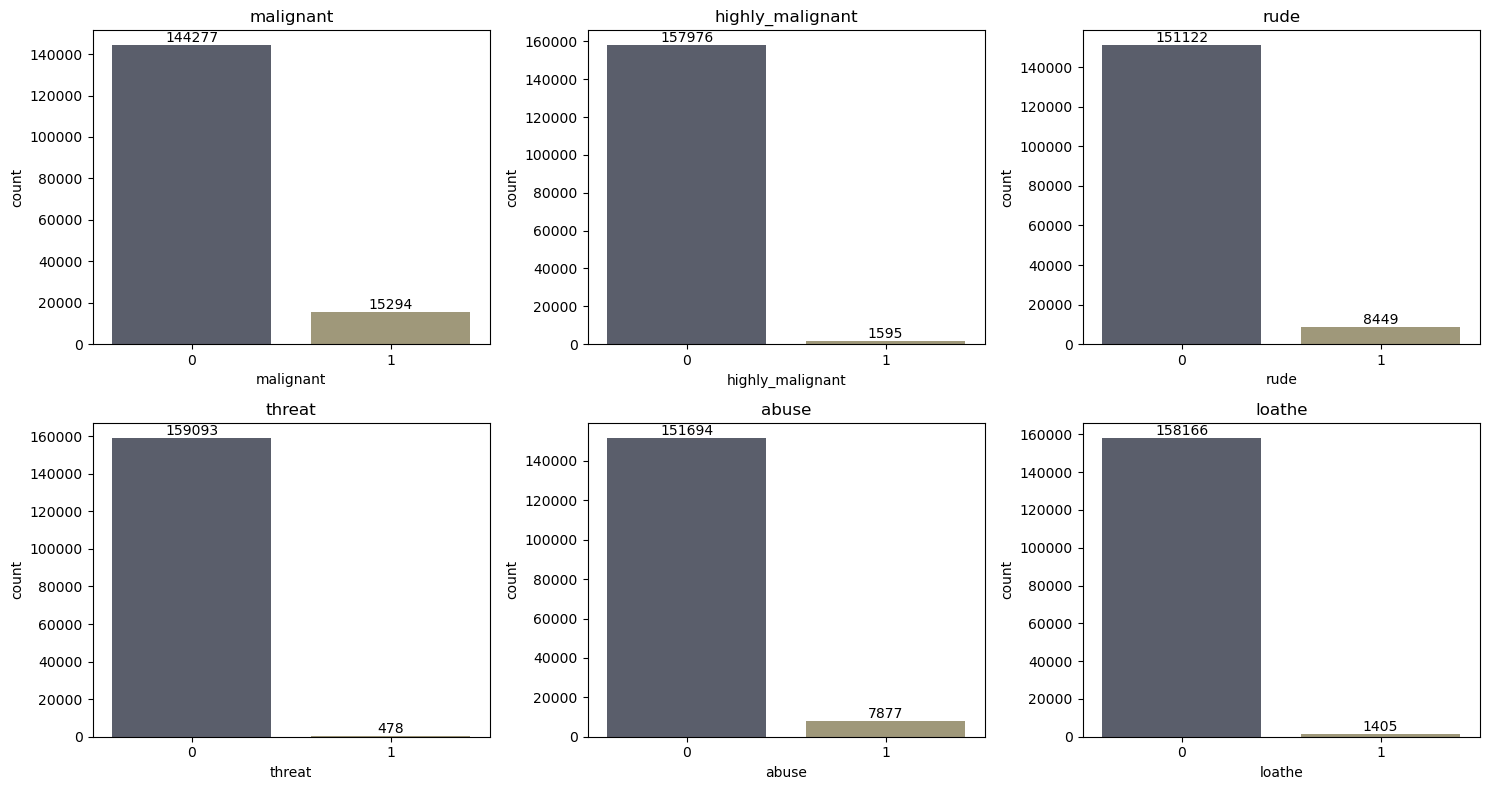

In [18]:
def plot_numerical_columns(data):
    numerical_col = data.select_dtypes(include="int64").columns
    num_col = 3  # number of columns
    num_row = (len(numerical_col) + num_col - 1) // num_col  # number of rows needed
    fig, axes = plt.subplots(num_row, num_col, figsize=(15, num_row * 4))

    for i, column in enumerate(numerical_col):
        ax = axes[i // num_col, i % num_col]  # Determining position in grid
        sns.countplot(x=data[column], palette='cividis', ax=ax)
        ax.set_title(column)
        
        # data labels
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
                    int(p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    
plot_numerical_columns(data)

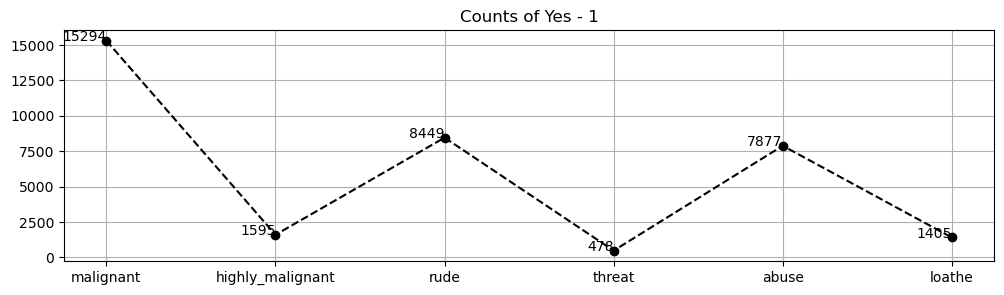

In [19]:
def plot_yes_values_line_graph(data):
    numerical_col = data.select_dtypes(include="int64").columns
    yes_counts = []

    # number of "Yes" (1) in each column
    for column in numerical_col:
        count_yes = (data[column] == 1).sum()
        yes_counts.append(count_yes)

    # Plotting values
    plt.figure(figsize=(12, 3))
    plt.plot(numerical_col, yes_counts, marker='o', linestyle='--', color='black')

    # Adding data labels
    for i, count in enumerate(yes_counts):
        plt.text(numerical_col[i], count, str(count), fontsize=10, ha='right')

    plt.title('Counts of Yes - 1')
    plt.grid(True)
    plt.show()

plot_yes_values_line_graph(data)


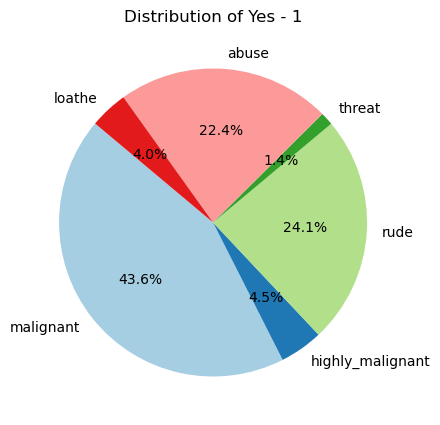

In [20]:
def plot_yes_values_pie_chart(data):
    numerical_col = data.select_dtypes(include="int64").columns
    yes_counts = []

    # Number of "Yes" (1) in each column
    for column in numerical_col:
        count_yes = (data[column] == 1).sum()
        yes_counts.append(count_yes)

    # Plotting the pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(yes_counts, labels=numerical_col, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(numerical_col))))
    plt.title('Distribution of Yes - 1')
    plt.show()

plot_yes_values_pie_chart(data)


> Malignant, Rude and Abuse have the high numbers.

<Figure size 1000x700 with 0 Axes>

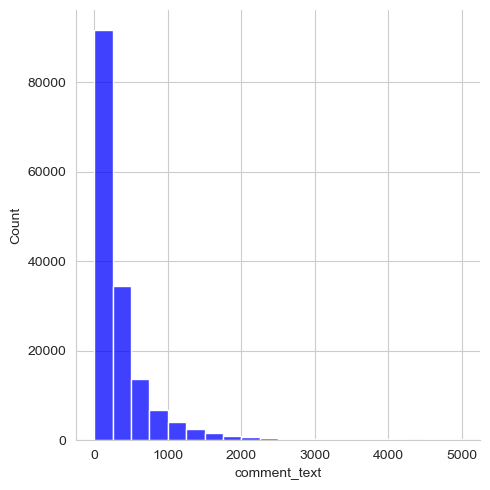

In [22]:
# length of Comments
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = data['comment_text'].str.len()
sns.displot(comment_len, bins=20, color= 'blue') 

In [23]:
data_numeric = data.select_dtypes(include='int64')

correlation_matrix = data_numeric.corr().round(2)
correlation_matrix

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.00,0.31,0.68,0.16,0.65,0.27
highly_malignant,0.31,1.00,0.40,0.12,0.38,0.20
rude,0.68,0.40,1.00,0.14,0.74,0.29
threat,0.16,0.12,0.14,1.00,0.15,0.12
abuse,0.65,0.38,0.74,0.15,1.00,0.34
loathe,0.27,0.20,0.29,0.12,0.34,1.00


>Highest Correlation
>
> Rude and Abuse = 0.74
>
> Malignant and Rude = 0.68
>
> Malignant and Abuse = 0.65

**Feature Eng**

In [26]:
data['label_existence'] = data[['malignant','highly_malignant','rude','threat','abuse','loathe']].sum(axis=1)
data['label_existence'].value_counts()

# 0 representing that there are no lables like malignant, rude, etc available in the column 

label_existence
0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: count, dtype: int64

In [27]:
data['label_existence'] = data['label_existence'].apply(lambda x: 1 if x>0 else 0)
data['label_existence'].value_counts()

label_existence
0    143346
1     16225
Name: count, dtype: int64

In [28]:
data['comment_len'] = data['comment_text'].apply(len)
data['comment_len'].value_counts()

comment_len
24      629
34      628
32      617
31      615
33      609
       ... 
3062      1
3838      1
4208      1
3174      1
3508      1
Name: count, Length: 4048, dtype: int64

In [29]:
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [30]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
# Replacing '\n' in comment_text
data['comment_text'] = data['comment_text'].replace('\n', ' ')

#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):

    #convert to lower case
    lowered_text = text.lower()

    #Replacing email address with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)

    #Replacing URLs with webaddress
    text = re.sub(r'https\S+', 'webaddress', text)

    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)

    #Removing HTML tags
    text = re.sub(r'<.*?>', " ", text)

    #Removing Punctuations
    text = re.sub(r'[^\w\s]', " ", text)
    text = re.sub(r'\_', " ", text)

    #Removing all the non-ascii characters
    text = re.sub(r'[^\x00-\x7f]', r'', text)

    #Removing unwanted whitespaces
    text = " ".join(text.split())

    #Splitting data into words - Splits the cleaned text into individual words (tokens)
    tokenized_text = word_tokenize(text)    

    #Removing remainig tokens that are not alphabetic, Removing stop words and lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]

    return " ".join(removed_stop_text)
    


In [33]:
data['comment_text'] = data['comment_text'].apply(clean_comments)
data['comment_text']

0                                                                                                                                                                                                                         explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired
1                                                                                                                                                                                                                                                                                                                  aww match background colour seemingly stuck thanks talk january utc
2                                                                                                                                                                                                                                        hey man really tr

In [34]:
data.rename(columns={'comment_len':'label_before_cleaning'}, inplace = True)

In [35]:
data['label_after_cleaning'] = data['comment_text'].apply(len)
data.head(20)

#There is extensively change in the label length after cleaning which can be visible in label_before_cleaning and label_after_cleaning

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label_existence,label_before_cleaning,label_after_cleaning
0,explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck thanks talk january utc,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered section statistic later subsection type accident think reference may need tidying exact format ie date format etc later one else first preference formatting style reference want please let know appears backlog article review guess may delay reviewer turn listed relevant form eg wikipedia good article nomination transport,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
5,congratulation well use tool well talk,0,0,0,0,0,0,0,65,38
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
7,vandalism matt shirvington article reverted please banned,0,0,0,0,0,0,0,115,57
8,sorry word nonsense offensive anyway intending write anything article wow would jump vandalism merely requesting encyclopedic one use school reference selective breeding page almost stub point animal breeding short messy article give info must someone around expertise eugenics,0,0,0,0,0,0,0,472,277
9,alignment subject contrary dulithgow,0,0,0,0,0,0,0,70,36


In [36]:
#Checking total cleaned text
print("Original Text:", data['label_before_cleaning'].sum())
print("Cleaned Text:", data['label_after_cleaning'].sum())
print("Total Words Removed:", (data['label_before_cleaning'].sum())-(data['label_after_cleaning'].sum()))

Original Text: 62893130
Cleaned Text: 38762914
Total Words Removed: 24130216


In [37]:
from collections import Counter

def most_frequent_words(data, top_n=20):
    result = {}
    for column in data.columns:
        if column == 'comment_text':
            continue
        filtered_data = data[data[column] == 1]
        words = []
        for text in filtered_data['comment_text']:
            words.extend(word_tokenize(text.lower()))
        word_counts = Counter(words)
        word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', f'{column}_count'])
        top_word_counts_df = word_counts_df.sort_values(by=f'{column}_count', ascending=False).head(top_n)
        result[column] = top_word_counts_df
    return result

grouped_count = most_frequent_words(data)

for column, group_count in grouped_count.items():
    print(f"column: {column}")
    print(group_count)


column: malignant
          word  malignant_count
93        fuck            10007
761       suck             4678
186  wikipedia             3670
124       shit             3639
216       like             3638
422     nigger             3427
399          u             3373
81     fucking             3289
63          go             3004
96          as             2941
419     faggot             2693
360       hate             2682
87        page             2589
114        get             2448
102       know             2297
39         gay             2266
232      bitch             2266
129        die             2082
261        fat             1970
202     people             1934
column: highly_malignant
            word  highly_malignant_count
16          fuck                    7319
181         suck                    3496
206           as                    2115
6           shit                    1887
29             u                    1631
268       faggot                    157

## Training the model

In [39]:
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')
tf_vec

TfidfVectorizer(max_features=15000, stop_words='english')

In [40]:
from sklearn.model_selection import train_test_split

x = tf_vec.fit_transform(data['comment_text'])
y = data['label_existence']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,stratify=y)

## Selecting the Best model for Training

In [42]:
#Importing functions to evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Model-Selection
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
import xgboost as xgb

from sklearn import metrics

In [43]:
def evaluate_model(estimator, x_train, y_train, cv=5):
    scoring = {
        "accuracy": "accuracy",
        "precision": "precision_weighted",
        "recall": "recall_weighted",
        "f1": "f1_weighted"
    }
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    
    # Return the mean scores
    return {
        "accuracy": scores['test_accuracy'].mean(),
        "precision": scores['test_precision'].mean(),
        "recall": scores['test_recall'].mean(),
        "f1": scores['test_f1'].mean()
    }

In [44]:
models = [LogisticRegression(), 
          RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), 
          ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), 
          GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()
         ]

model_names = ["Logistic Regression", 
               "Random Forest",
               "Decision Tree",
               "Extra Tree",
               "Ada Boost", 
               "Gradient Boosting",
               "XGBoost"]

In [45]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n{model_names[model]}")

    clf_scores = evaluate_model(models[model], x_train, y_train)

    accuracy.append(f"{clf_scores['accuracy']:.3f}")
    precision.append(f"{clf_scores['precision']:.3f}")
    recall.append(f"{clf_scores['recall']:.3f}")
    f1.append(f"{clf_scores['f1']:.3f}")

    print(f"Accuracy: {accuracy[-1]}")
    print(f"Precision: {precision[-1]}")
    print(f"Recall: {recall[-1]}")
    print(f"f1: {f1[-1]}")



Logistic Regression
Accuracy: 0.955
Precision: 0.954
Recall: 0.955
f1: 0.950

Random Forest
Accuracy: 0.956
Precision: 0.954
Recall: 0.956
f1: 0.953

Decision Tree
Accuracy: 0.940
Precision: 0.939
Recall: 0.940
f1: 0.939

Extra Tree
Accuracy: 0.923
Precision: 0.925
Recall: 0.923
f1: 0.924

Ada Boost
Accuracy: 0.946
Precision: 0.942
Recall: 0.946
f1: 0.940

Gradient Boosting
Accuracy: 0.940
Precision: 0.941
Recall: 0.940
f1: 0.930

XGBoost
Accuracy: 0.953
Precision: 0.952
Recall: 0.953
f1: 0.949


In [46]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
1,Random Forest,0.956,0.954,0.956,0.953
0,Logistic Regression,0.955,0.954,0.955,0.950
6,XGBoost,0.953,0.952,0.953,0.949
4,Ada Boost,0.946,0.942,0.946,0.940
2,Decision Tree,0.940,0.939,0.940,0.939
5,Gradient Boosting,0.940,0.941,0.940,0.930
3,Extra Tree,0.923,0.925,0.923,0.924


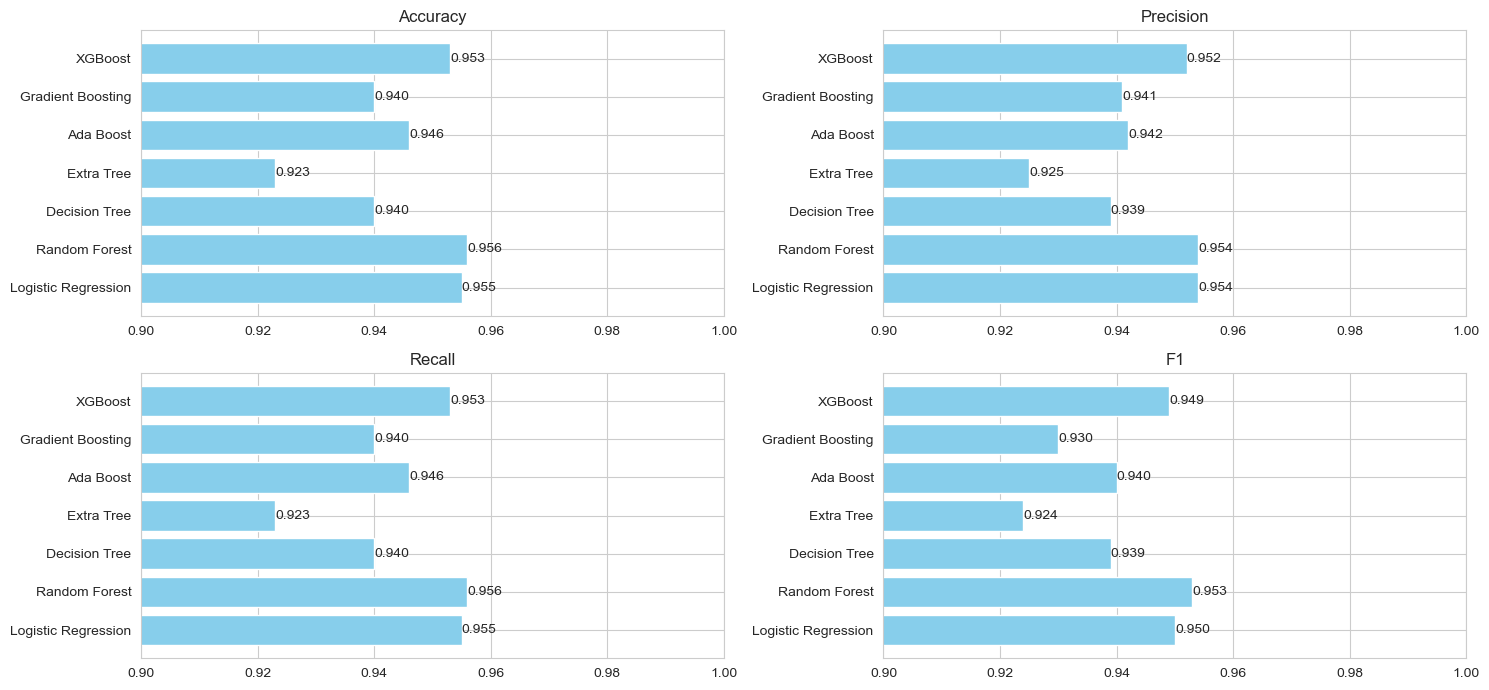

In [47]:
metrics = ["accuracy", "precision", "recall", "f1"]
df_result[metrics] = df_result[metrics].apply(pd.to_numeric)

fig, axs = plt.subplots(2, 2, figsize=(15, 7))
axs = axs.ravel()

for i, metric in enumerate(metrics):
    axs[i].barh(df_result["Model"], df_result[metric], color='skyblue')
    axs[i].set_title(metric.capitalize())
    axs[i].set_xlim(0.9, 1)
    for index, value in enumerate(df_result[metric]):
        axs[i].text(value, index, f"{value:.3f}", va='center', ha='left')

plt.tight_layout()
plt.show()

### Key Observation:
>Among our model we have Random Forest which tops the chart.
>
>
>accuracy= 0.956
>
>precision= 0.954
>
>recall= 0.956
>
>f1= 0.9533

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

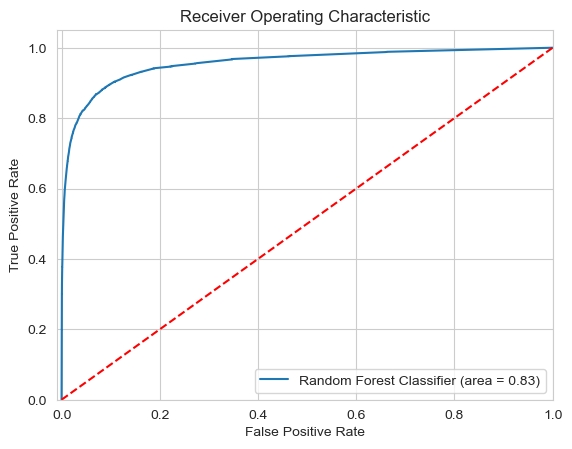

In [50]:
roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
rf.get_params()

preds = cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames =['Predicted'])



Predicted,0,1
Actual,,
0,106241,1268
1,4006,8163


In [52]:
print(classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    107509
           1       0.87      0.67      0.76     12169

    accuracy                           0.96    119678
   macro avg       0.91      0.83      0.87    119678
weighted avg       0.95      0.96      0.95    119678



In [53]:
import pickle

# Saving the model
filename = 'comments_classification_NLP.pickle'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)
